In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_absolute_percentage_error,mean_squared_error, r2_score

In [6]:
import scipy.stats  as stats

# Linear regression

In [7]:
dfRaw = pd.read_csv('TSLA.csv', index_col = 'Date', parse_dates = True)
dfRaw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800


In [8]:
df = pd.DataFrame(dfRaw['Adj Close'])
df

,Adj Close
Date,
2020-01-02,86.052002
2020-01-03,88.601997
2020-01-06,90.307999
2020-01-07,93.811996
2020-01-08,98.428001
...,...
2020-12-24,661.770020
2020-12-28,663.690002
2020-12-29,665.989990


<AxesSubplot:xlabel='Date'>

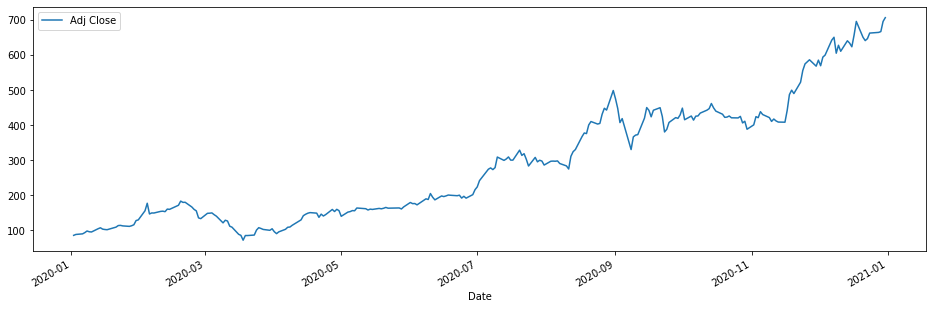

In [9]:
plt.rc("figure", figsize=(16,5))
df.plot()

### Removing high frequency fluctuations using moving average

In [10]:
df['EMA_10'] = df.ta.ema(close = 'Adj Close', length = 10, inplace = True)
df.dropna(inplace = True)
df

,Adj Close,EMA_10
Date,,
2020-01-15,103.699997,96.535599
2020-01-16,102.697998,97.656035
2020-01-17,102.099998,98.464028
2020-01-21,109.440002,100.459660
2020-01-22,113.912003,102.905540
...,...,...
2020-12-24,661.770020,643.572394
2020-12-28,663.690002,647.230141
2020-12-29,665.989990,650.641022


<AxesSubplot:xlabel='Date'>

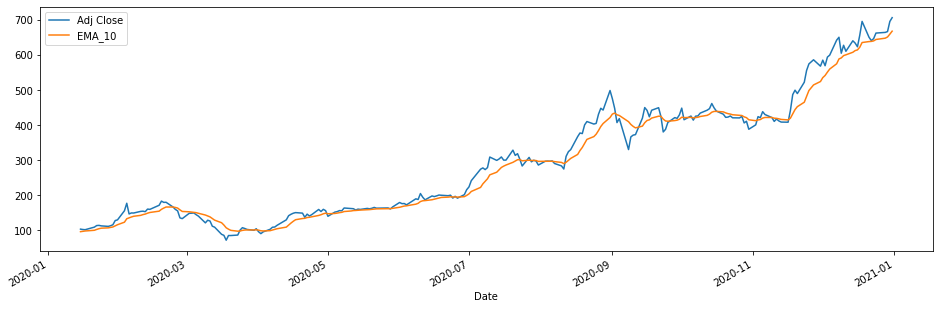

In [11]:
df.plot()

### Split into test and train

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size = 0.2)

### Modeling using just linear regression

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Predictions using the model

In [14]:
y_pred = model.predict(x_test)

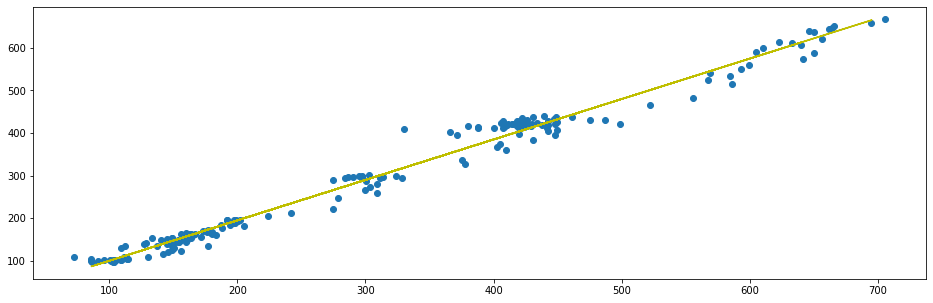

In [15]:
plt.scatter(x_train.values, y_train.values)
plt.plot(x_test.values, y_pred, color = 'y')

# SARIMAX

### Importing and fixing up the DataFrame

In [16]:
df = pd.read_csv('RestaurantVisitors.csv', index_col = 'date', parse_dates = True)
df.index.freq = 'D'
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [17]:
df1 = df.dropna()
df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


In [18]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in cols:
    df1[col] = df1[col].astype(int)

df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90


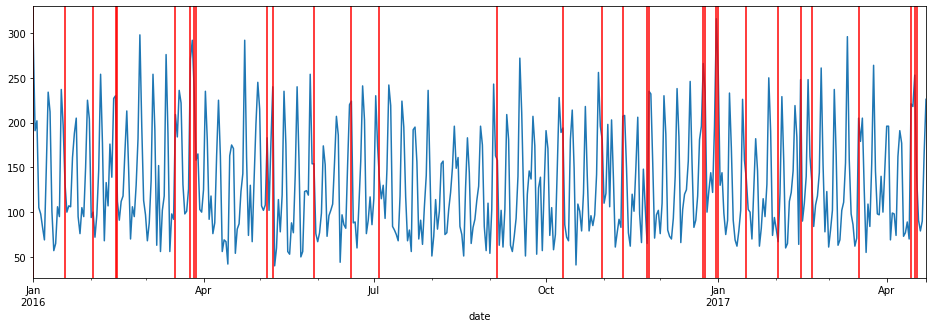

In [19]:
ax = df1['total'].plot()
for x in df1.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

### Seasonal decompose

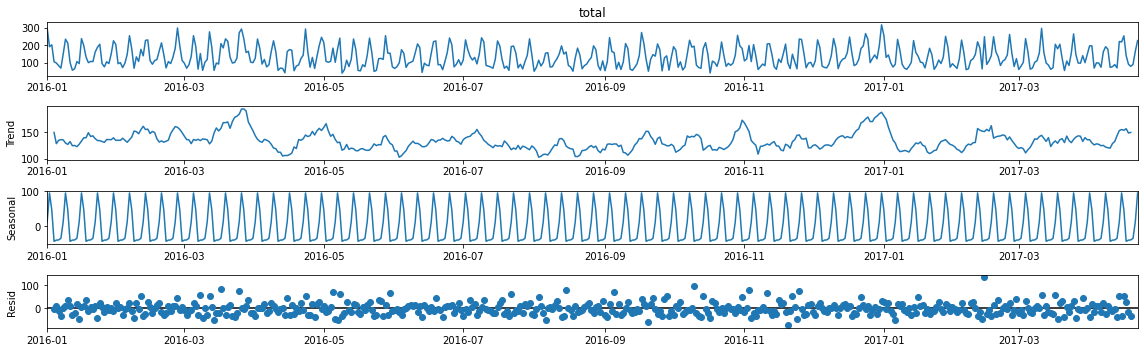

In [20]:
result = seasonal_decompose(df1['total'])
result.plot();

### Auto-ARIMA

In [21]:
auto_arima(df1['total'], seasonal = True, m = 7, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=0.65 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=4921.605, Time=1.06 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4803.730, Time=0.46 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.20 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4953.332, Time=1.02 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.50 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4777.153, Time=0.38 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.576
Date:                   Sat, 30 Apr 2022   AIC                           4777.153
Time:                           00:39:50   BIC                           4793.831
Sample:                                0   HQIC                          4783.710
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8446      1.723      2.812      0.005       1.468       8.221
ar.S.L7        0.9644      0.013     75.911      0.000       0.940       0.989
ma.S.L7       -0.7958      0.047    -17.109      0.000      -0.887      -0.705
sigma2      1221.2562     71.881     16.990      0.000    1080.373    1362.140
===================================================================================
Ljung-Box (L1) (Q):                  17.61   Jarque-Bera (JB):                66.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using best model

In [22]:
train = df1.iloc[:436]
test = df1.iloc[436:]
len(test)

42

In [23]:
model = SARIMAX(train['total'], order = (0, 0, 0), seasonal_order = (1, 0, 1, 7)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Sat, 30 Apr 2022   AIC                           4336.738
Time:                           00:39:50   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8069     58.739     18.928      0.000     996.681    1226.933
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

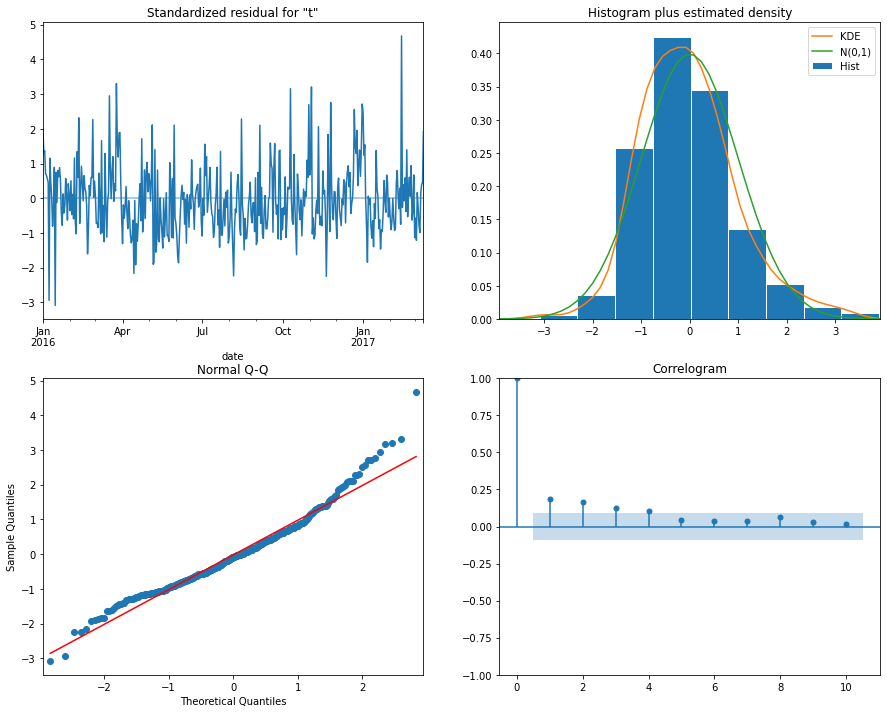

In [24]:
model.plot_diagnostics(figsize = (15, 12));

### Forecasting using the model

In [25]:
start = len(train)
end = start + len(test) - 1
predictions = model.predict(start = start, end = end, dynamic = False).rename('SARIMA')

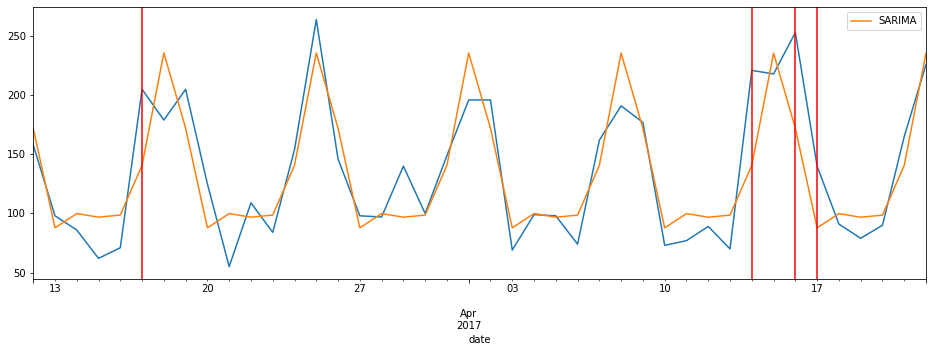

In [26]:
ax = test['total'].plot()
predictions.plot(legend = True)
for x in test.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

In [27]:
mean_absolute_percentage_error(test['total'], predictions)

0.20157078326057315

### Exogeneus model using holidays as variables

In [28]:
modelExog = SARIMAX(train['total'], exog = train['holiday'], order = (0, 0, 0), seasonal_order = (1, 0, 1, 7)).fit()
modelExog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.412
Date:                   Sat, 30 Apr 2022   AIC                           4204.824
Time:                           00:39:51   BIC                           4221.134
Sample:                       01-01-2016   HQIC                          4211.260
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6575      3.969     17.550      0.000      61.878      77.437
ar.S.L7        0.9999   7.58e-05   1.32e+04      0.000       1.000       1.000
ma.S.L7       -0.9429      0.023    -40.374      0.000      -0.989      -0.897
sigma2       813.7149     47.400     17.167      0.000     720.813     906.616
===================================================================================
Ljung-Box (L1) (Q):                  15.57   Jarque-Bera (JB):                20.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
predictionsExog = modelExog.predict(start = start, end = end, exog = test['holiday'], dynamic = False).rename('SARIMAX')

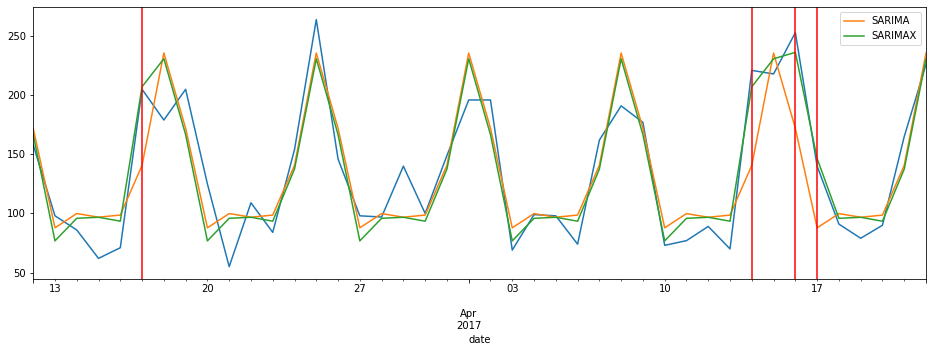

In [30]:
ax = test['total'].plot()
predictions.plot(legend = True)
predictionsExog.plot(legend = True)
for x in test.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

In [31]:
mean_absolute_percentage_error(test['total'], predictionsExog)

0.16143567084327806

# Things we did on lab nr. 7

In [32]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [34]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

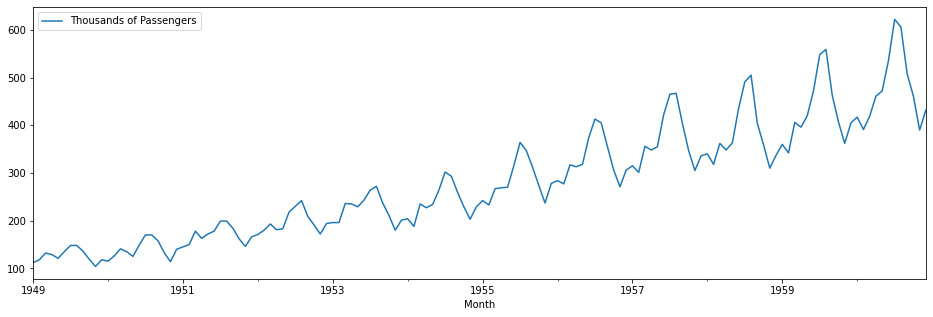

In [35]:
df.plot()

In [36]:
seasonalDecomposition = seasonal_decompose(df, model = 'mul')

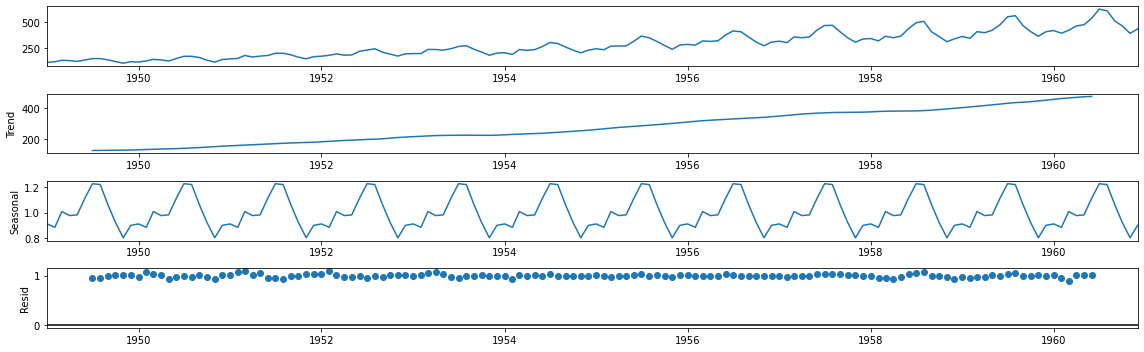

In [37]:
seasonalDecomposition.plot();

In [38]:
auto_arima(df, seasonal = True, m = 12, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.36 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.11 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.34 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.09 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.29 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.28 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.61 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.03 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.02 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sat, 30 Apr 2022   AIC                           1017.847
Time:                                     00:39:55   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.595      0.000      -1.057      -0.907
sigma2       129.3136     14.556      8.884      0.000     100.784     157.844
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
train = df.iloc[:-12]
test = df.iloc[-12:]
len(test)

12

In [40]:
model = SARIMAX(train, order = (2, 1, 1), seasonal_order = (0, 1, 0, 12))
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -447.483
Date:                             Sat, 30 Apr 2022   AIC                            902.967
Time:                                     00:39:56   BIC                            914.083
Sample:                                 01-01-1949   HQIC                           907.481
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.929     -0.566      0.572      -2.345       1.295
ar.L2          0.0110      0.275      0.040      0.968      -0.529       0.551
ma.L1          0.3064      0.935      0.328      0.743      -1.527       2.140
sigma2       108.0094     13.498      8.002      0.000      81.553     134.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.97   Prob(JB):                         0.50
Heteroskedasticity (H):               1.47   Skew:                            -0.09
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False).rename('SARIMA(2, 1, 1)(0, 1, 0, 12)')

<AxesSubplot:xlabel='Month'>

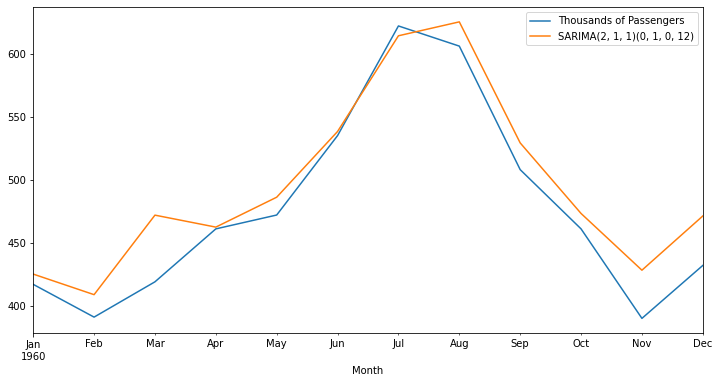

In [43]:
ax = test.plot(legend = True, figsize = (12, 6))
predictions.plot(legend = True)

In [44]:
mean_absolute_percentage_error(test, predictions)

0.04431754845556079

# Box-Cox transformation

Text(0.5, 0, '')

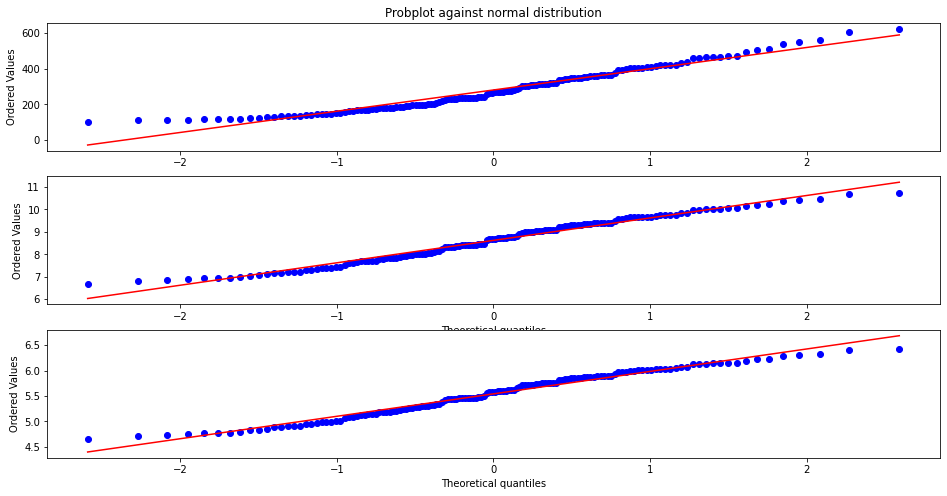

In [48]:
x = df['Thousands of Passengers']
xt, lambda_mle = stats.boxcox(x)
x_log = np.log(x)
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (16, 8))
stats.probplot(x, dist = stats.norm, plot = ax1);
stats.probplot(xt, dist = stats.norm, plot = ax2);
stats.probplot(x_log, dist = stats.norm, plot = ax3);
ax1.set_title('Probplot against normal distribution')
ax2.set_title('')
ax3.set_title('')
ax1.set_xlabel('')

In [49]:
lambda_mle

0.14802265137037945

##### Box-Cox transformation is very close to logarithm

In [50]:
df['log'] = np.log(df['Thousands of Passengers'])
df

,Thousands of Passengers,log
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791
...,...,...
1960-08-01,606,6.406880
1960-09-01,508,6.230481
1960-10-01,461,6.133398


### Checking auto arima for logarithm of data

In [51]:
auto_arima(df['log'], seasonal = True, m = 12, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-482.835, Time=1.07 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-358.005, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-472.836, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-423.080, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-152.756, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-485.488, Time=0.95 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-455.356, Time=0.28 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-483.597, Time=2.17 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-479.079, Time=0.77 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-483.227, Time=2.71 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-486.634, Time=0.76 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-455.568, Time=0.17 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-480.390, Time=0.89 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-484.607, Time=1.98 sec
 ARIMA(1,0,2)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 249.648
Date:                              Sat, 30 Apr 2022   AIC                           -489.295
Time:                                      01:00:48   BIC                           -474.881
Sample:                                           0   HQIC                          -483.438
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.008      2.331      0.020       0.003       0.035
ar.L1          0.5759      0.075      7.650      0.000       0.428       0.723
ar.L2          0.2615      0.084      3.118      0.002       0.097       0.426
ma.S.L12      -0.5558      0.106     -5.238      0.000      -0.764      -0.348
sigma2         0.0013      0.000      8.858      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.44
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               0.58   Skew:                             0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using best model for predictions

In [54]:
train = df.iloc[:-12]
test = df.iloc[-12:]
len(test)

12

In [55]:
model2 = SARIMAX(train['log'], order = (2, 0, 0), seasonal_order = (0, 1, 1, 12))
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  log   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 224.272
Date:                              Sat, 30 Apr 2022   AIC                           -440.545
Time:                                      01:03:09   BIC                           -429.395
Sample:                                  01-01-1949   HQIC                          -436.017
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6787      0.074      9.169      0.000       0.534       0.824
ar.L2          0.3140      0.076      4.149      0.000       0.166       0.462
ma.S.L12      -0.5616      0.094     -5.963      0.000      -0.746      -0.377
sigma2         0.0013      0.000      8.156      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.97   Prob(JB):                         0.61
Heteroskedasticity (H):               0.34   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
predictions2 = results2.predict(start = start, end = end, dynamic = False).rename('SARIMAX')

<AxesSubplot:xlabel='Month'>

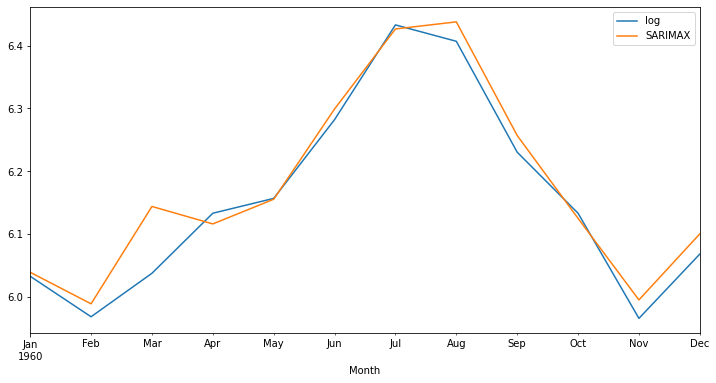

In [60]:
ax = test['log'].plot(legend = True, figsize = (12, 6))
predictions2.plot(legend = True)

In [61]:
mean_absolute_percentage_error(test['log'], predictions2)

0.004121319142804993

In [62]:
mean_absolute_percentage_error(test['Thousands of Passengers'], np.exp(predictions2))

0.025840068581486672